In [92]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [93]:
from cartes.osm import Overpass
import logging

logging.getLogger().setLevel(logging.INFO)

data_list = list(
    Overpass.request(area=area, way=dict(railway="rail"))
    for area in [
        "Ile de France",
        "Hauts de France",
        "Grand Est",
        "Bourgogne Franche Comté",
        "Auvergne Rhone Alpes",
        "Provence Alpes Cote d'Azur",
        "Occitanie",
        "Nouvelle Aquitaine",
        "Centre Val de Loire",
        "Pays de la Loire",
        "Normandie",
        "Bretagne",
        "Corse",
    ]
)

In [94]:
from geopandas import GeoDataFrame
import pandas as pd

data = GeoDataFrame(pd.concat(d.data for d in data_list))

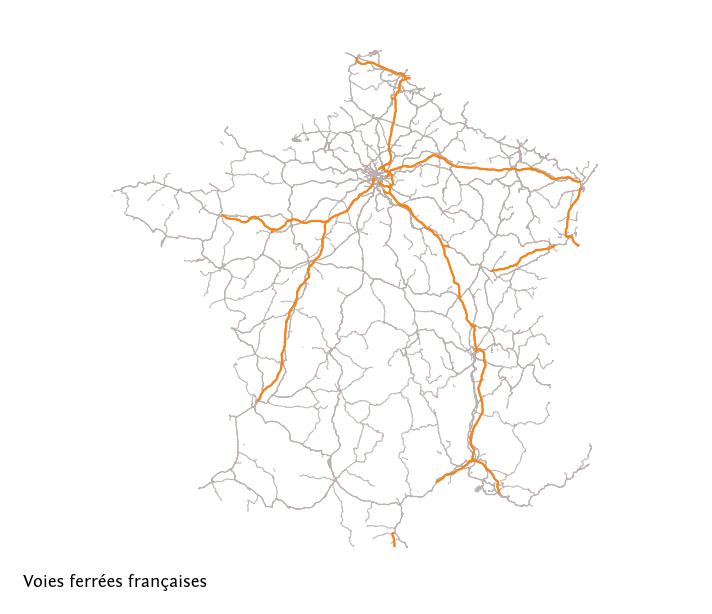

In [95]:
import matplotlib.pyplot as plt
from cartes.crs import Lambert93, PlateCarree
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=Lambert93()))

ax.add_geometries(data.geometry.to_list(), color="#bab0ac", crs=PlateCarree())
ax.add_geometries(
    data.query(
        '(description.notnull() and description.str.contains("LGV")) '
        ' or highspeed == "yes"'
    ).geometry.to_list(),
    color="#f58518",
    linewidth=2,
    crs=PlateCarree(),
)

ax.spines["geo"].set_visible(False)

text = AnchoredText(
    "Voies ferrées françaises",
    loc=3,
    frameon=False,
    prop={"size": 18, "fontname": "Fontin Sans"},
)
ax.add_artist(text)
ax.set_extent((-6, 10, 41, 51.5))

fig.set_tight_layout(True)
fig.savefig("challenge_day2.png", dpi=300, facecolor="white")